In [1]:
# importing libraries
import re # for regular expressions
import nltk # text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)


%matplotlib inline


In [2]:
# reading data

train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
train[train['label']==0].head() # non-racist/sexist

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
train[train['label']==1].head() # racist/sexist

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [5]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [6]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

We can see that only few words are important we will keep only that. And the data is imbalanced. Now we will check the distribution of length of the tweets, in terms of words, in both train and test data. 

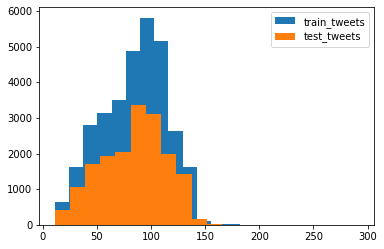

In [7]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20,label="train_tweets")
plt.hist(length_test,bins=20, label="test_tweets")
plt.legend()
plt.show()

Cleaning raw text data is an important step. Removing punctuation, special characters, nnumbers, and terms which don't carry much weightage in context to the text. We will combine train and text data and do the cleaning.

In [8]:
combi = train.append(test,ignore_index=True)
combi.shape

/home/akshay/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(49159, 3)

In [9]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt =  re.sub(i,'',input_txt)
    return input_txt    

We will be following the steps below to clean the raw tweets in out data.

1. We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.

2. We will also get rid of the punctuations, numbers and even special characters since they wouldn't help in differentiating different types of tweets.

3. Most of the smaller words do not add much value. For example, 'pdx','his','all'. So we will try to remove them as well from our data.

4. Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., 'love' are ofthen used in the same context. If we can reduce them to their root word, which is 'love'. It will help in reducing the total number of unique words in our data without losing a significant amount of information.









1. Removing twitter handles(@user)

Let's create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed "@[]*" as the pattern to the remove_pattern function. It is actually a regular expression which  will pick any word starting with '@'.

In [10]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


2. Removing Punctuations, Numbers, and Special Characters

Here we will replace everything except characters and hastags with spaces. The regular expression "[^a-zA-Z#]" means anything except alphabets and '#'.


In [11]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


3. Removing Short Words

We have to be a little careful here in selecting the length of the words which we want to remove. So I have decided to remove all the words having length 3 or less. For example, terms like "hmm", "oh" are of very little use. It is better to get rid of them. 


In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


4. Text normalization

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [13]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [15]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x ]) # stemming

Now let's stitch these tokens back together. It can easily be done using nltk's MosesDetokenizer function

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet    

Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

1. What are the most common words in the entire dataset?
2. What are the most common words in the dataset for negative and positive tweets, respectively?
3. How many hastags are there in a tweet?
4. Which trends are associated with either of the sentiments? Are they compatible with the sentiments?
5. Which trends are associated with either of the sentiments? Are they compatible with the sentiments?


A) Undestanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherenin the most frequent words appear in large size and the less frequent words appear in smaller sizes

Let's visualize all the words our data using the wordcloud plot.

     |████████████████████████████████| 361 kB 3.0 MB/s eta 0:00:01


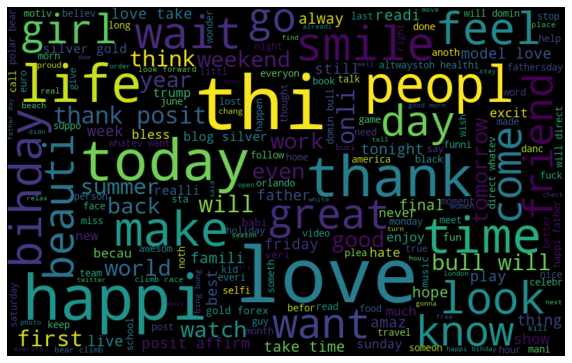

In [18]:
!pip install wordcloud
all_words = " ".join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state =21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

we can see most of the words are positive or neutral. Words like love,great, friend, life are the most frequent ones. It does not give us any idea about the words assoicated with the racis/sexist tweets. hence we will plot separate wordclouds for both the classes in our train data 

B) Words in non racist/sexist tweets

